In [1]:
import pandas as pd

data_path = "data_preprocessed/1_europe_txt_cleaning.csv"
df = pd.read_csv(data_path)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2243 entries, 0 to 2242
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             2243 non-null   int64 
 1   pub_year       2243 non-null   int64 
 2   text_preproc1  2243 non-null   object
dtypes: int64(2), object(1)
memory usage: 52.7+ KB


In [5]:
import sys
sys.path.append('../..')

from src.moduls.pipeline_de import spacy_tags

In [6]:
from parallel_pandas import ParallelPandas

#initialize parallel-pandas
ParallelPandas.initialize(n_cpu=20, split_factor=1, disable_pr_bar=False)

df['tags'] = df['text_preproc1'].p_apply(spacy_tags)

SPACY_TAGS DONE:   0%|          | 0/2243 [00:00<?, ?it/s]

In [7]:
# Flatten the lists of lists into individual rows
exploded_tags = df.explode('tags')

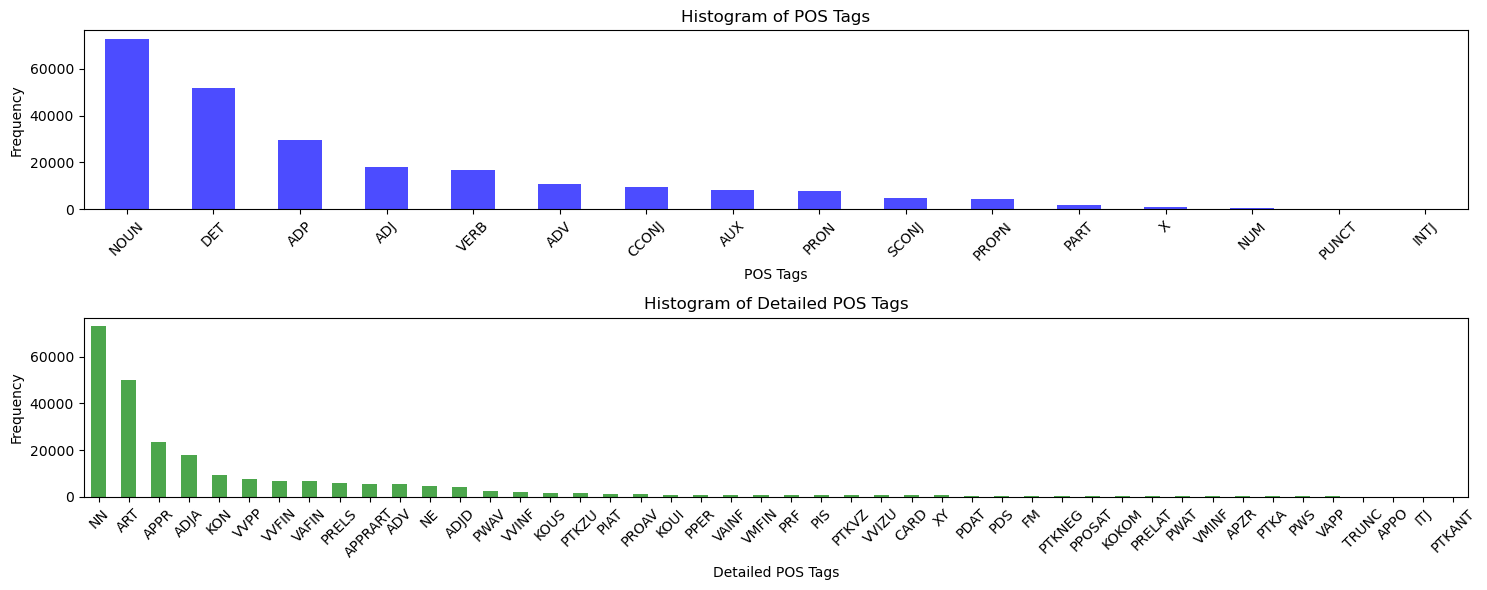

In [8]:
import matplotlib.pyplot as plt

# Extract the second and third items
exploded_tags['text'] = exploded_tags['tags'].apply(lambda x: x[0] if isinstance(x, list) else "UNKNOWN")
exploded_tags['pos'] = exploded_tags['tags'].apply(lambda x: x[1] if isinstance(x, list) else "UNKNOWN")
exploded_tags['tag'] = exploded_tags['tags'].apply(lambda x: x[2] if isinstance(x, list) else "UNKNOWN")

# Count the frequency of each POS and TAG
pos_counts = exploded_tags['pos'].value_counts()
tag_counts = exploded_tags['tag'].value_counts()

# Plot the histograms
fig, ax = plt.subplots(2, 1, figsize=(15, 6))

# Plot POS histogram
pos_counts.plot(kind='bar', ax=ax[0], color='blue', alpha=0.7)
ax[0].set_xlabel('POS Tags')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Histogram of POS Tags')
ax[0].tick_params(axis='x', rotation=45)

# Plot TAG histogram
tag_counts.plot(kind='bar', ax=ax[1], color='green', alpha=0.7)
ax[1].set_xlabel('Detailed POS Tags')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Histogram of Detailed POS Tags')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [9]:
# Group by `tag` and aggregate token texts
tag_token_groups = exploded_tags.groupby('tag')['text'].agg(set)

# Convert to DataFrame for better readability
tag_token_df = tag_token_groups.reset_index()
tag_token_df.columns = ['tag', 'token_texts']

# Set the `tag` column as index
tag_token_df.set_index('tag', inplace=True)

In [14]:
pd.set_option('display.max_colwidth', None)  # Show all data in columns
tag_token_df[tag_token_df.index.isin(['PIDAT', 'PIAT', 'NN', 'NE', 'ADJA', 'ADJD', 'VVFIN', 'VVINF', 'VVPP', 'VMPP', 'VAPP', 'VVPP', 'VVIZU'])]

,token_texts
tag,
ADJA,"{befindlich, vorangegangen, tischartige, viskos, verwaltend, eigen, kohärent, umfassendein, benutzerfreundlich, zentral, physisch, rekurrent, handelnd, ereignisgesteuerten, zweiter, datenbasiert, angemischt, erlangt, kletterfähig, adaptiert, sensorgebunden, vorhergesagt, trennend, magnetfeldbasiert, eindringend, distal, positionsbezogen, haltend, ausgewertet, einseitig, fehlerhaft, gehandhabt, selbstfahrender, vorgehalten, kegelförmig, vorläufig, zusammenklappbar, angemessen, bestärkend, send, ungleichmäßig, armspezifisch, metrisch, herausnehmbar, bewerten, abgerufen, assoziiert, rotatorisch, selbstführend, einstellungsinformation, blockierend, passgenau, verloren, beschriftet, computergestützt, energieeffizient, trabgar, gelehrt, abdeckend, vorragend, zahlreich, versehen, klein, fertigbearbeitet, vorrobotergestützt, hochverdichtet, angesiedelt, geordnet, momentan, rohrförmig, master, greifend, übermäßig, rotierbar, versetzt, angebracht, bidirektional, bestückt, fahrzeugtypunabhängig, gerade, vorgegeben, benutzergetragen, blattförmig, hohlzylindrisch, gesucht, anfahrbar, lagenoberfläche, q, komplett, kollaborierend, vertikaler, minimiert, verbunden, netzwerkfähig, unerkannt, getragenes, erzielt, tragend, diskretisiert, entstehend, ...}"
ADJD,"{umstellbar, speicherbar, abfahrbar, übertragbar, elektrisch, stabil, kontrollierbar, undzwei, einhergehend, sehnenartig, abnehmbar, variierend, ausfahrbar, bedecken, zentral, physisch, montierbar, diskret, beaufschlagbar, bilateral, offline, konform, optimal, kostengünstig, absetzbar, verarbeitbar, digital, schnell, symmetrisch, drehbar, speziell, ausfiihrt, veränderlich, komplementär, niedrig, vorteilhafterweise, schwebend, übrig, sooft, abrufbar, reflektiert, ausbilden, ideal, distal, zuführbar, aufwickelbar, vorübergehend, werkzeuglos, ringförmig, gelegentlich, dementsprechend, hydraulisch, arm, weich, stark, anbringbar, angemessen, vorhanden, kinematisch, bildlich, dreidimensional, greifbar, undzu, rotatorisch, verschiebbar, zugänglich, spärlich, anordenbar, anwendbar, iberfordert, aufeinanderfolgend, höhenverstellbar, minimal, passgenau, wenbewegbar, lang, mehrdimensional, lokal, anordbar, erneut, modular, überspannend, bestückbar, indikativ, kapazitiv, aufladbar, applikationsabhängig, sicher, definitiv, klein, gelenkig, fluidführungstechnisch, möglich, beweglich, momentan, reflektierbar, anfänglich, durchein, bildbar, strukturell, ...}"
NE,"{prozesses, ausgangssignalen, oberflächenabschnitt, endeffektor, tj, sicherheitsmerkmale, additiver, kehr, umfassendein, stielbehafteten, wtoolundrrarr, stückgut, robotersteuerung, einstellungseinheit, abnaufweist, stoß, w., maschine, messzelle, messbereich, lasthandhabungsmanipulator, anwendungen, pcr, roboter, assay, schienenmontiertes, solar, schmirgler, datensatzes, geräts, unterdruckhandhabungseinrichtung, applikationsmittels, flotteninspektions, kartoffelschälscheibe, aktion, peg, schleifmedium, epitaktischer, doppelpunktschweißvorrichtung, roboterwerkzeugs, bestärkend, sicherheitszerlegung, reinigungseinheit, herstell, matrix, maschinellem, gvon, kraftwinders, baurobotersystems, mounted, bewegungsvorgabe, rumpf, anin, abstract, desinfektionsroboter, re, roboterwartungshalterung, pickrobotern, computergestützt, roboterachse, visualservoing, prioritätsbewusstsein, montagevorgang, geometrische, beförderungsvorgang, cfbodynbsp, einem, sensorsignal, blähkörper, versehen, f., motor, robotersystems, position, maschinenteils, verteiltes, schutz, nebst, kalman, aussenverzahnung, master, emic, blindnietverbinder, struktur, datengenerierung, leitungs, hangar, schweissprozess, gießen, roboters, festlegen, bereitstellungsbereich, befehlsmodul, drehzahlminderer, up, tripel, prozessautomatisierung, cnn, netzwerke, transportsystem, ...}"
NN,"{anforderungszustand, lenkelementende, sortieraufgabe, desinfektionseinrichtung, oberflächenabschnitt, schwenkstellungen, gesichtsverfolgungsverarbeitung, motorwelle, bewegungspfad, montageflä

In [11]:
# Group by `tag` and aggregate token texts
postag_token_groups = exploded_tags.groupby('pos')['text'].agg(set)

# Convert to DataFrame for better readability
postag_token_df = postag_token_groups.reset_index()
postag_token_df.columns = ['pos', 'token_texts']

# Set the `tag` column as index
postag_token_df.set_index('pos', inplace=True)

In [12]:
pd.set_option('display.max_colwidth', None)  # Show all data in columns
postag_token_df

,token_texts
pos,
ADJ,"{befindlich, vorangegangen, tischartige, endeffektor, viskos, platzierfläch, anschlagfläche, verwaltend, eigen, kohärent, umfassendein, benutzerfreundlich, zentral, physisch, rekurrent, handelnd, ereignisgesteuerten, zweiter, datenbasiert, angemischt, erlangt, adaptiert, sensorgebunden, vorhergesagt, trennend, magnetfeldbasiert, roboter, eindringend, distal, positionsbezogen, haltend, ausgewertet, einseitig, fehlerhaft, gehandhabt, selbstfahrender, vorgehalten, kegelförmig, vorläufig, zusammenklappbar, angemessen, bestärkend, ungleichmäßig, armspezifisch, metrisch, herausnehmbar, abgerufen, assoziiert, rotatorisch, einstellungsinformation, blockierend, passgenau, verloren, beschriftet, computergestützt, energieeffizient, trabgar, gelehrt, abdeckend, vorragend, zahlreich, versehen, klein, fertigbearbeitet, vorrobotergestützt, hochverdichtet, angesiedelt, geordnet, momentan, rohrförmig, master, greifend, übermäßig, rotierbar, blindnietverbinder, versetzt, angebracht, bidirektional, bestückt, fahrzeugtypunabhängig, i., gerade, vorgegeben, benutzergetragen, blattförmig, hohlzylindrisch, gesucht, anfahrbar, lagenoberfläche, q, komplett, kollaborierend, led, vertikaler, minimiert, verbunden, netzwerkfähig, unerkannt, getragenes, erzielt, ...}"
ADP,"{überwachen, vermittels, als, unter, unterhalb, undc, übertragen, mittels, hin, inkl., explodierten, aufgrund, pro, auf, ausserhalb, undbei, entsprechend, in, befördern, ohne, mittel, außerhalb, für, infolge, undein, inklusive, bezüglich, mit, umfasset, bakensignalsvon, zwischen, oberhalb, außer, vorgeben, zwecks, betreffend, anstelle, anstatt, u., entgegen, umfassenein, nah, um, neben, herum, lösen, gegen, überlappung, bei, von, jenseits, während, über, mithilfe, mitsamt, seitens, durch, trotz, undb, erhalten, her, n, nebst, ungeachtet, innerhalb, wegen, aus, einschließlich, laut, i., zum, zu, statt, undda, hinein, hinsichtlich, an, anbringung, entlang, ab, anhand, kraft, a, seit, gegenüber, vor, nahe, hinaus, b., bevor, undeine, cgvon, je, undwobei, nach, cfvon, gemäß, wie, bis, n., ...}"
ADV,"{ja, drehfest, umstellbar, speicherbar, abfahrbar, übertragbar, elektrisch, darauf, bereits, stabil, kontrollierbar, undzwei, derart, einhergehend, hier, sehnenartig, abnehmbar, variierend, gegebenenfalls, ausfahrbar, bedecken, zentral, physisch, montierbar, diskret, beaufschlagbar, bilateral, offline, konform, daneben, abschätzt, optimal, kostengünstig, desweiteren, verarbeitbar, absetzbar, hierzu, überall, dar, digital, schnell, drehbar, zugleich, speziell, ausfiihrt, veränderlich, komplementär, symmetrisch, niedrig, vorteilhafterweise, mit, zumeist, schwebend, weiterhin, übrig, stromaufwärts, abrufbar, sooft, reflektiert, blockweise, ausbilden, widerum, ideal, distal, zuführbar, anvon, aufwickelbar, bekanntermaßen, vorübergehend, einerseits, werkzeuglos, ringförmig, folglich, gelegentlich, dementsprechend, hydraulisch, arm, weich, stark, anbringbar, angemessen, vorhanden, kinematisch, bildlich, dreidimensional, greifbar, undzu, rotatorisch, verschiebbar, zugänglich, spärlich, anordenbar, anwendbar, iberfordert, aufeinanderfolgend, doppeltwirkender, höhenverstellbar, minimal, passgenau, wenbewegbar, ...}"
AUX,"{möchten, werden, muss, bin, müssen, soll, sodass, können, müssten, dürfen, haben, sollen, sein}"
CCONJ,"{erfolgtsowie, undod, als, unter, noch, bzw., undoder, aber, weder, sondern, iaeund, und, wie, bis, sowohl, sowie, sollund, beziehungsweise, oder, entweder, mehrere, blockweise}"
DET,"{viel, einem, einen, ist, welcher, vieler, jeglicher, irgendein, umfassendeine, dendier, weniger, zustand, fahrerloses, autonomen, alle, meister, jedmöglicher, mehr, das, einiger, denjenig, undoder, kein, eine, denjeniger, d., mitein, unddas, eines, mehrerer, dassdie, dasselbe, sämtlicher, der, maschinenler, einige, dessen, d, die, dieser, erster, keinerlei, ein, wobeidas, einer, ner, beide, sein, undd, undein, c., wobeider, dem, anwendung, aller, ar, solcher, derjenige, dassdas, jed